In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt


def generate_data(n=100):
    result = random.choices([0, 1], weights=[0.1, 0.9], k=n)
    result = np.array(result, dtype=float)
    result[result == 0] = np.random.normal(10, 1, len(result[result == 0]))
    result[result == 1] = np.random.normal(5, 1, len(result[result == 1]))
    return result

In [24]:
class kde:

    def __init__(self, kernel_type="gaussian", bandwidth=1):
        self.kernel_type = kernel_type
        self.bandwidth = bandwidth

    def fit(self, data):
        self.data = data
        self.min = np.min(data)
        self.max = np.max(data)
        self.n = len(data)

    def gaussian_kernel(self, x):
        return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2)

    def transform(self, x):
        tmp = np.zeros(len(x))
        for i in self.data:
            x = (x - i) / self.bandwidth
            if self.kernel_type == "gaussian":
                tmp += self.gaussian_kernel(x)
        return tmp / self.n

In [25]:
kd = kde()

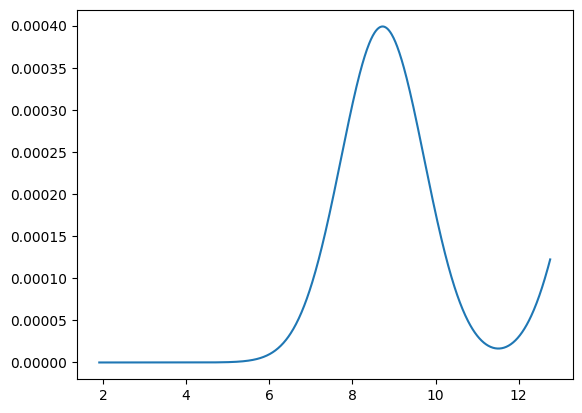

In [47]:
data = generate_data(1000)

kd.fit(data)
plt.plot(
    np.linspace(kd.min, kd.max, 1000), kd.transform(np.linspace(kd.min, kd.max, 1000))
)